In [1]:
import sqlite3
import numpy as np
import pandas as pd

In [2]:
conn = sqlite3.connect("../database/health_indicators.db")
diabetes_health_indicators_df = pd.read_sql("SELECT * FROM diabetes_health_indicators;", conn)
conn.close()

EDA

In [ ]:
print("Dataframe Head:")
display(diabetes_health_indicators_df.head())

Dataframe Head:


,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


In [4]:
print("\nDescribe:")
print(diabetes_health_indicators_df.describe(include='all'))


Describe:
                 age  gender ethnicity education_level income_level  \
count   100000.00000  100000    100000          100000       100000   
unique           NaN       3         5               4            5   
top              NaN  Female     White      Highschool       Middle   
freq             NaN   50216     44997           44891        35152   
mean        50.12041     NaN       NaN             NaN          NaN   
std         15.60460     NaN       NaN             NaN          NaN   
min         18.00000     NaN       NaN             NaN          NaN   
25%         39.00000     NaN       NaN             NaN          NaN   
50%         50.00000     NaN       NaN             NaN          NaN   
75%         61.00000     NaN       NaN             NaN          NaN   
max         90.00000     NaN       NaN             NaN          NaN   

       employment_status smoking_status  alcohol_consumption_per_week  \
count             100000         100000                 100000.

In [5]:
print("\nNull Values in Each Column:")
print(diabetes_health_indicators_df.isnull().sum())


Null Values in Each Column:
age                                   0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
employment_status                     0
smoking_status                        0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
glucose_fas

In [6]:
print("\nDuplicated Rows")
print(diabetes_health_indicators_df.duplicated().sum())


Duplicated Rows
0


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
numerical_cols = diabetes_health_indicators_df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = diabetes_health_indicators_df.select_dtypes(include=['object', 'category']).columns

C:\Users\awoln\AppData\Local\Temp\ipykernel_27480\2667111730.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosed_diabetes', data=diabetes_health_indicators_df, palette='Set2')


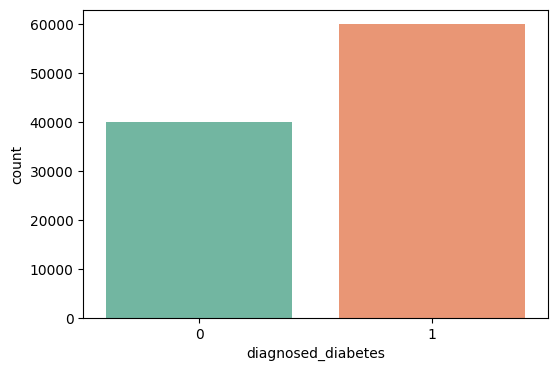

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='diagnosed_diabetes', data=diabetes_health_indicators_df, palette='Set2')
plt.show()

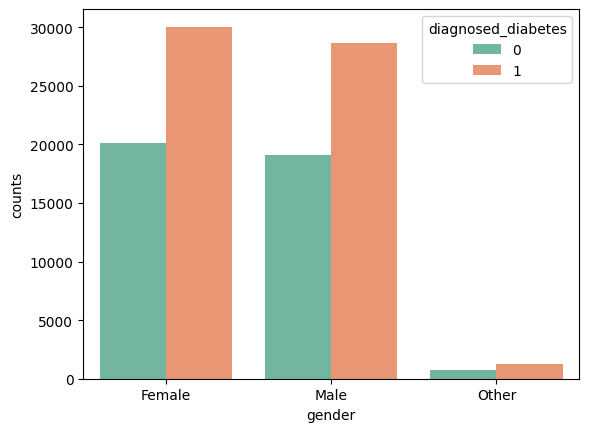

In [10]:
gender_diabetes = diabetes_health_indicators_df.groupby(['gender', 'diagnosed_diabetes']).size().reset_index(name='counts')
sns.barplot(x='gender', y='counts', hue='diagnosed_diabetes', data=gender_diabetes, palette='Set2')
plt.show()

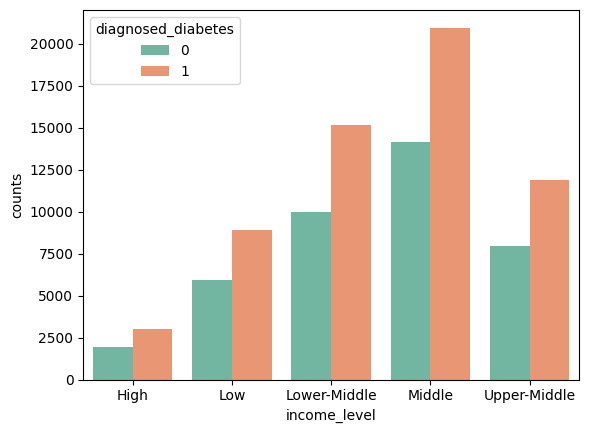

In [11]:
income_level_diabetes = diabetes_health_indicators_df.groupby(['income_level', 'diagnosed_diabetes']).size().reset_index(name='counts')
sns.barplot(x='income_level', y='counts', hue='diagnosed_diabetes', data=income_level_diabetes, palette='Set2')
plt.show()

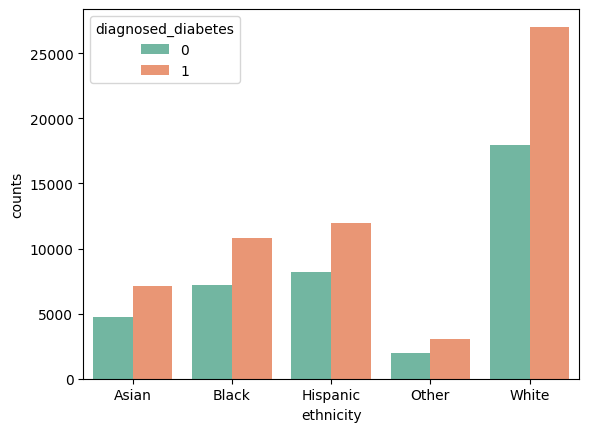

In [12]:
ethnicity_diabetes = diabetes_health_indicators_df.groupby(['ethnicity', 'diagnosed_diabetes']).size().reset_index(name='counts')
sns.barplot(x='ethnicity', y='counts', hue='diagnosed_diabetes', data=ethnicity_diabetes, palette='Set2')
plt.show()

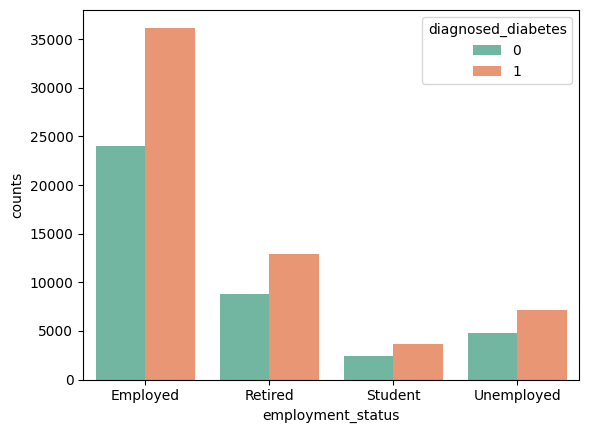

In [13]:
employment_diabetes = diabetes_health_indicators_df.groupby(['employment_status', 'diagnosed_diabetes']).size().reset_index(name='counts')
sns.barplot(x='employment_status', y='counts', hue='diagnosed_diabetes', data=employment_diabetes, palette='Set2')
plt.show()

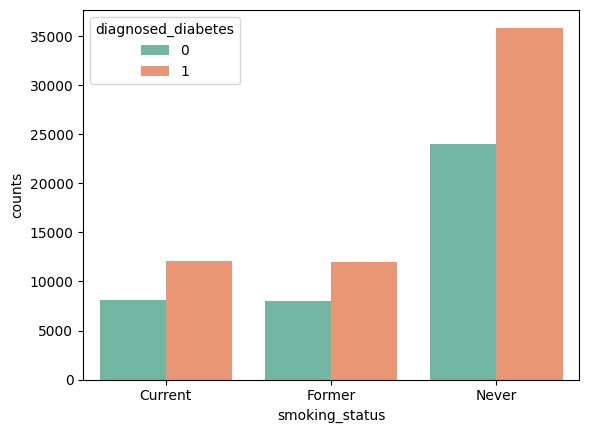

In [14]:
smoking_diabetes = diabetes_health_indicators_df.groupby(['smoking_status', 'diagnosed_diabetes']).size().reset_index(name='counts')
sns.barplot(x='smoking_status', y='counts', hue='diagnosed_diabetes', data=smoking_diabetes, palette='Set2')
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_cols = diabetes_health_indicators_df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    diabetes_health_indicators_df[col] = label_encoder.fit_transform(diabetes_health_indicators_df[col])

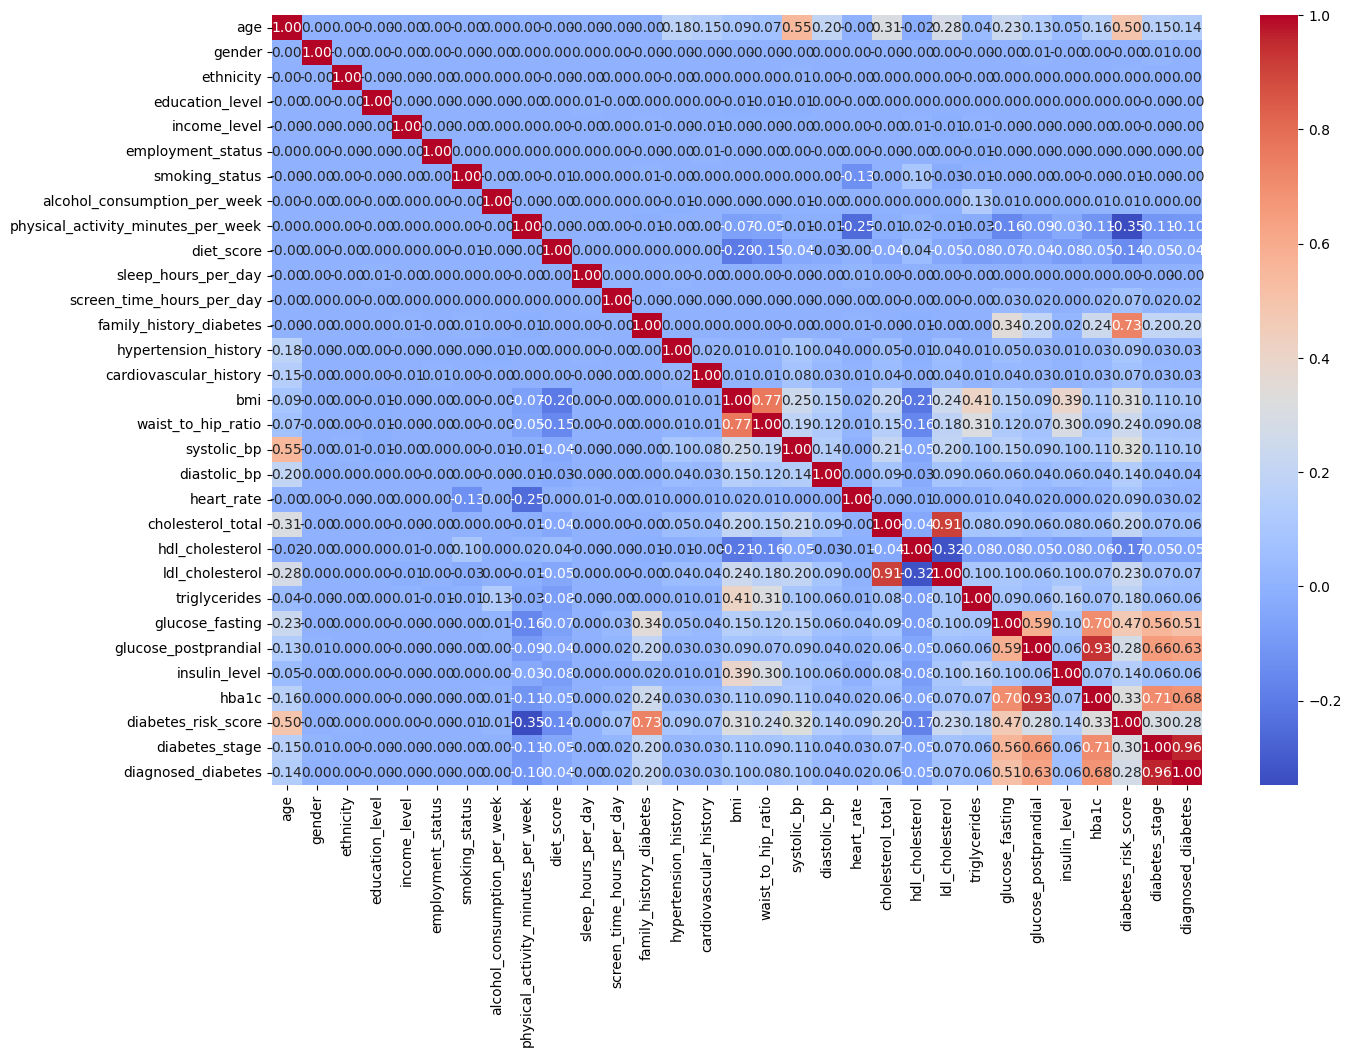

In [16]:
diabetes_numeric_df = diabetes_health_indicators_df.select_dtypes(include=[np.number])
plt.figure(figsize=(15,10))
corr = diabetes_numeric_df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [17]:

target_corr = corr["diagnosed_diabetes"].sort_values(ascending=False)
print(target_corr)

diagnosed_diabetes                    1.000000
diabetes_stage                        0.961453
hba1c                                 0.679397
glucose_postprandial                  0.629832
glucose_fasting                       0.510919
diabetes_risk_score                   0.277300
family_history_diabetes               0.197926
age                                   0.137713
bmi                                   0.097057
systolic_bp                           0.095481
waist_to_hip_ratio                    0.078918
ldl_cholesterol                       0.067475
cholesterol_total                     0.058173
insulin_level                         0.057715
triglycerides                         0.056230
diastolic_bp                          0.035619
cardiovascular_history                0.029793
hypertension_history                  0.027524
heart_rate                            0.022785
screen_time_hours_per_day             0.018127
gender                                0.004581
ethnicity    